# Distributions

In [133]:
%config InlineBackend.figure_format ='retina'

In [134]:
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [135]:
%config InlineBackend.figure_format ='retina'
sns.set(style="whitegrid")

In [136]:
data_daily = yf.download('^SPX')
data_weekly = yf.download('^SPX', interval='1wk')
data_monthly = yf.download('^SPX', interval='1mo')

data = data_weekly
data.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1950-01-02,16.660000,17.090000,16.660000,17.090000,17.090000,9040000
1950-01-09,17.080000,17.090000,16.650000,16.650000,16.650000,14790000
1950-01-16,16.719999,16.940001,16.719999,16.940001,16.940001,7980000
1950-01-23,16.920000,16.920000,16.730000,16.900000,16.900000,7430000
1950-01-30,17.020000,17.350000,17.020000,17.350000,17.350000,10120000


In [137]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-08,4703.700195,4802.399902,4699.819824,4783.830078,4783.830078,18017190000
2024-01-15,4772.350098,4842.069824,4714.819824,4839.810059,4839.810059,16495350000
2024-01-22,4853.419922,4906.689941,4844.049805,4890.970215,4890.970215,19914270000
2024-01-29,4892.950195,4929.310059,4887.399902,4927.930176,4927.930176,3525160000
2024-01-30,4925.890137,4931.089844,4916.270020,4924.970215,4924.970215,2566848275


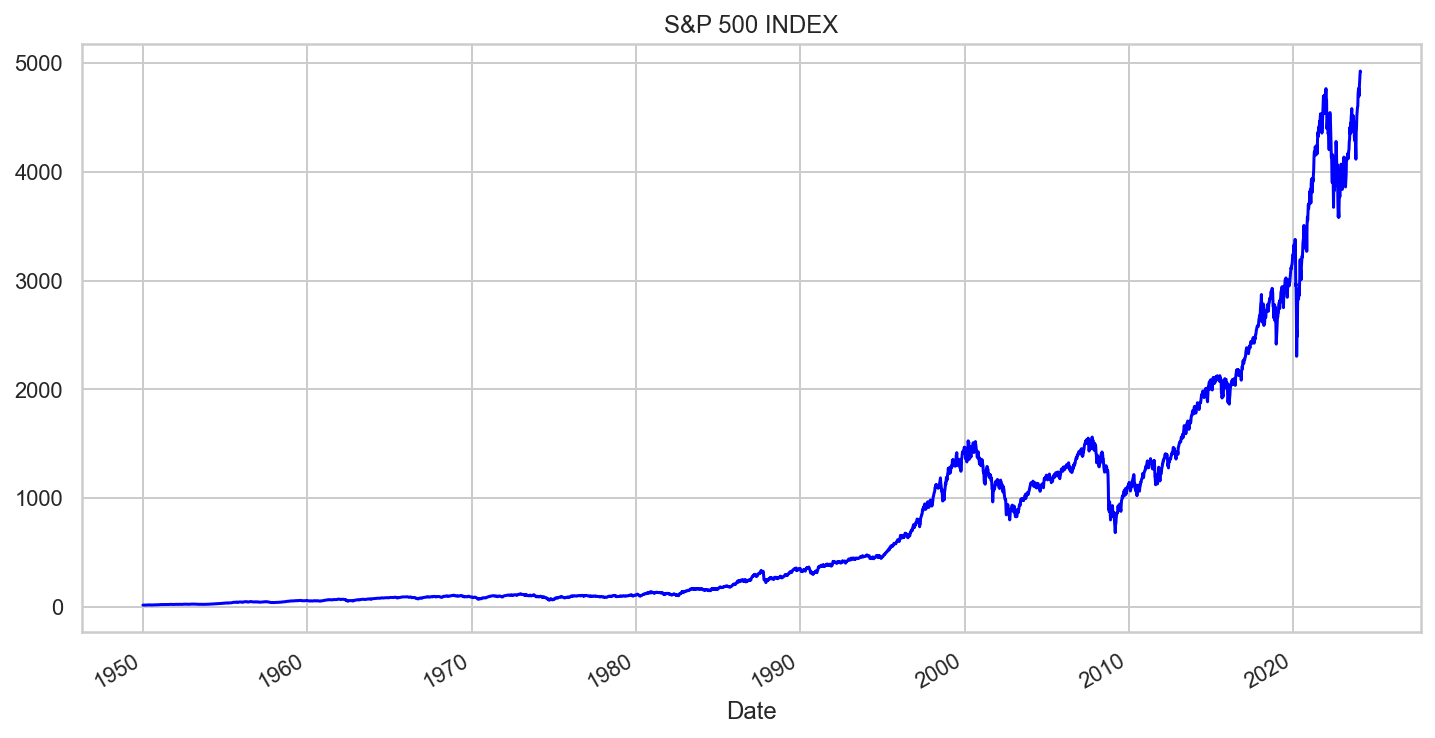

In [138]:
plt.figure(figsize=(12, 6))
data['Close'].plot(color='blue', title="S&P 500 INDEX")
plt.show()

In [139]:
from datetime import datetime
import numpy as np
from scipy.stats import kurtosis, skew

kind = 'standard'

df = data

if kind == 'standard':
    column = 'Returns'
    df.loc[:, column] = 100*(df['Adj Close'] - df['Adj Close'].shift(1))/df['Adj Close']

elif kind == 'log':

    column = 'Log-Returns'
    df.loc[:, column] = np.log(df['Adj Close']) - \
        np.log(df['Adj Close'].shift(1))

df = df.reset_index()
df['year'] = df['Date'].dt.year
df['Decade'] = [int(np.floor(year/10) * 10) for year in np.array(df["year"])]
df = df.dropna()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Returns,year,Decade
1,1950-01-09,17.080000,17.090000,16.650000,16.650000,16.650000,14790000,-2.642646,1950,1950
2,1950-01-16,16.719999,16.940001,16.719999,16.940001,16.940001,7980000,1.711930,1950,1950
3,1950-01-23,16.920000,16.920000,16.730000,16.900000,16.900000,7430000,-0.236692,1950,1950
4,1950-01-30,17.020000,17.350000,17.020000,17.350000,17.350000,10120000,2.593664,1950,1950
5,1950-02-06,17.320000,17.320000,17.209999,17.209999,17.209999,8750000,-0.813488,1950,1950


In [140]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Returns,year,Decade
3862,2024-01-08,4703.700195,4802.399902,4699.819824,4783.830078,4783.830078,18017190000,1.810053,2024,2020
3863,2024-01-15,4772.350098,4842.069824,4714.819824,4839.810059,4839.810059,16495350000,1.156657,2024,2020
3864,2024-01-22,4853.419922,4906.689941,4844.049805,4890.970215,4890.970215,19914270000,1.046012,2024,2020
3865,2024-01-29,4892.950195,4929.310059,4887.399902,4927.930176,4927.930176,3525160000,0.750010,2024,2020
3866,2024-01-30,4925.890137,4931.089844,4916.270020,4924.970215,4924.970215,2566848275,-0.060101,2024,2020


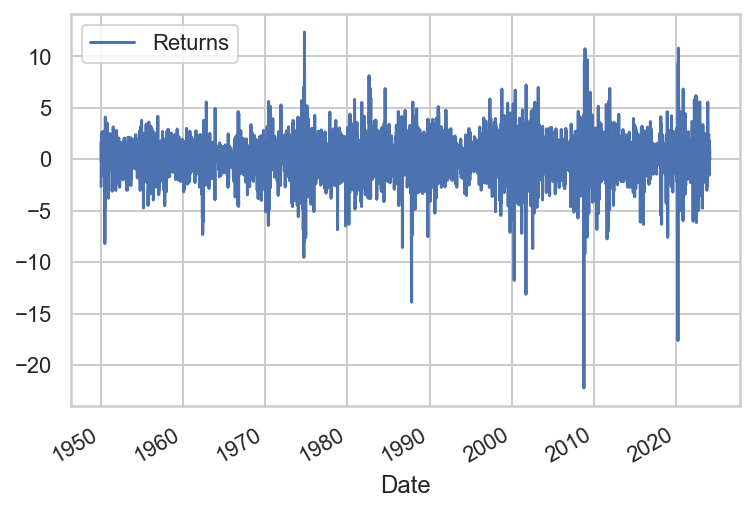

In [141]:
fig = df.plot(x='Date', y ='Returns')
plt.show()

In [142]:
import plotly.express as px
fig = px.line(df, x='Date', y='Returns',
              title='S&P500')

fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(template="plotly_white")
fig.show()

In [143]:
df.Decade.unique()

array([1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020])

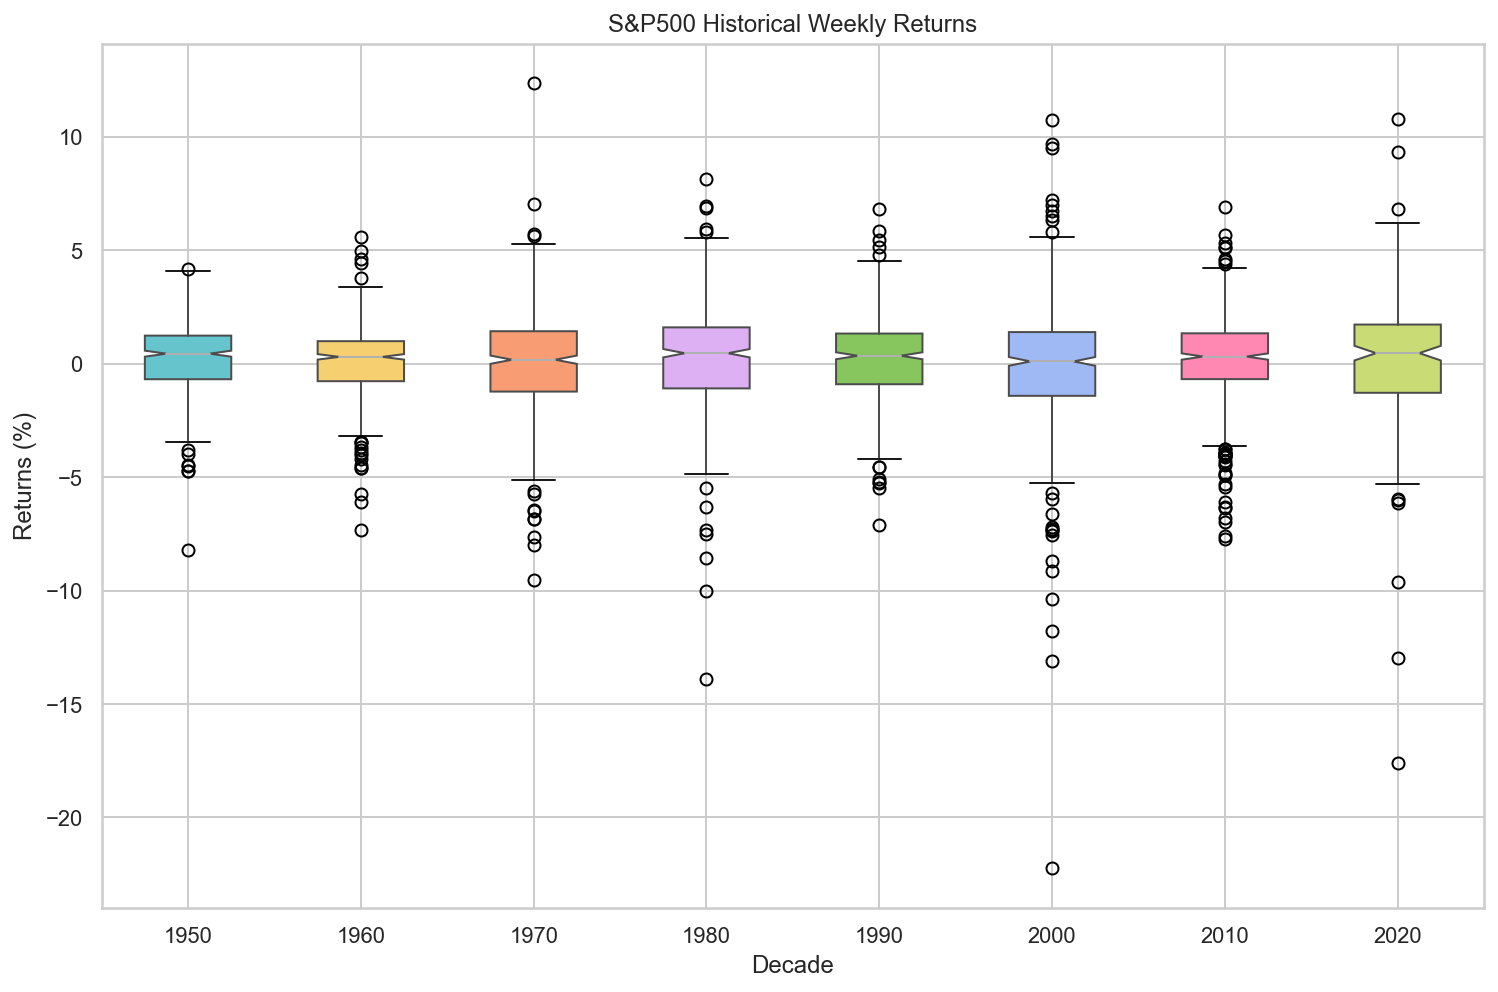

In [144]:
from matplotlib.patches import PathPatch
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
box = df.boxplot(by='Decade', column='Returns', ax=ax,
                 return_type='dict', patch_artist=True, notch=True)

ax.set_title('S&P500 Historical Weekly Returns')
ax.set_xlabel('Decade')
ax.set_ylabel('Returns (%)')
plt.suptitle('')  # that's what you're after

# fill with colors


colors = ['#66c5cc', '#f6cf71', '#f89c74', '#dcb0f2', '#87c55f', '#9eb9f3', '#fe88b1', '#c9db74']
for patch, color in zip(box['Returns']['boxes'], colors):
    patch.set_facecolor(color)

plt.show()

In [145]:
import plotly.graph_objects as go
import plotly.express as px 

# dta = df[df.Decade >= 1980]
dta =df
fig = px.box(data_frame=dta,  x='Decade', y='Returns', labels={'Returns':"Returns (%)"},
             color='Decade',
            hover_data={'Date': True, 'Returns': ':.2f', 'High': ':.2f', 'Decade':False},
                notched=True, color_discrete_sequence=px.colors.qualitative.Pastel
            )
fig.update_layout(
    title='S&P500 Historical Weekly Returns',
    autosize=False,
    width=1000,
    height=600,
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        # gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    # paper_bgcolor='rgb(243, 243, 243)',
    # plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False
)
fig.update_layout(template="plotly_white")
                  
fig.show()